In [20]:
import matplotlib.pyplot as plt

import pandas as pd
import requests
import json
import csv

Goal: Use the fantasy premier league API to assess performance and identify underrated players to increase my performance

# How has my team performed throughout the season? 


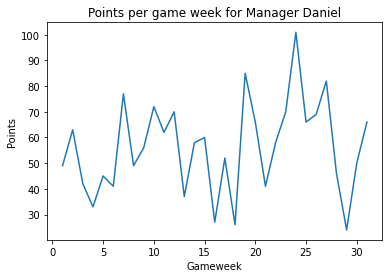

In [21]:
# https://medium.com/@frenzelts/fantasy-premier-league-api-endpoints-a-detailed-guide-acbd5598eb19

history_response = requests.get('https://fantasy.premierleague.com/api/entry/707457/history/')
#history_response = requests.get('https://fantasy.premierleague.com/api/entry/5241548/history/') ##DANIEL

#print(response.status_code)


data = json.loads(history_response.text)
season = data['current']

gameweek = []
points= []
for game in season:
    gameweek.append(game['event'])
    points.append(game['points']) 
    
plt.plot(gameweek, points)
plt.xlabel("Gameweek")
plt.ylabel("Points")
#plt.title("Points per game week for Manager Fiona")
plt.title("Points per game week for Manager Daniel")
plt.show()



How has that compared to the average? 

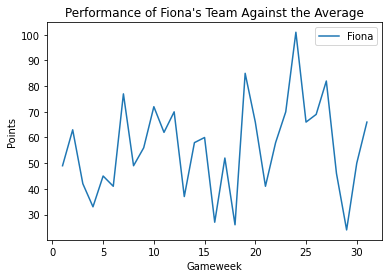

In [22]:
bs_response = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')

bs_data = json.loads(bs_response.text)
events= bs_data['events']

#print(events)


avg_points = []

for event in events:
    #print (event['id'])
    if (event['finished']):
        avg_points.append(event['average_entry_score'])

#plt.plot(gameweek, avg_points, linestyle='dashed', color='red', label='Gameweek Average')
plt.plot(gameweek, points, label='Fiona')
plt.xlabel("Gameweek")
plt.ylabel("Points")
plt.title('Performance of Fiona\'s Team Against the Average')
plt.legend()
plt.show()

visualize a player's performance over the game weeks


     index                        name
0        1                  Mesut Özil
1        2   Sokratis Papastathopoulos
2        3  David Luiz Moreira Marinho
3        4   Pierre-Emerick Aubameyang
4        5               Cédric Soares
..     ...                         ...
686    617         Andreas Söndergaard
687    626             Patrick Cutrone
688    629               Nigel Lonwijk
689    642       Willian José Da Silva
690    649                  Hugo Bueno

[691 rows x 2 columns]


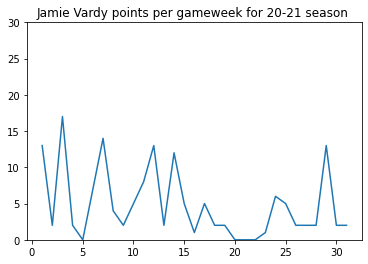

In [58]:
#load players id and names into dictionary
players = bs_data['elements']
teams = bs_data['teams'] 



player_dict = {
    #Pierre-Emerick Aubameyang : 4,
    #Mohamed Salah: 254
}


#populate dictionary with ids and names of players from json
player_name = None
for player in players:
    p_id = player['id'] 
    player_name = player['first_name'] + ' ' + player['second_name'] 
    player_dict[p_id] =  player_name

player_id_df = pd.DataFrame.from_dict(player_dict, orient='index', columns=['name'])
player_id_df= player_id_df.reset_index() 
print(player_id_df)
#reverse order of k,v to be able to perform name lookup
inv_player_dict = { v: k for k,v in player_dict.items() }


#Use dictionary to call API to get stats on that player for each game
#player = input('Enter player\'s full name: ')
player = 'Jamie Vardy'

def get_total_points_by_player(player):
    try:
        url = 'https://fantasy.premierleague.com/api/element-summary/' + str(inv_player_dict[player]) + '/'
    except:
        print('Player not found')
        exit()
    response = requests.get(url)
    total_points = []
    
    if response.status_code == 200:
        data = json.loads(response.text)
        games = data['history']
        
        
        for game in games:
            total_points.append(game['total_points'])
            
    return total_points


plt.plot(gameweek, get_total_points_by_player(player))
plt.title(player + ' points per gameweek for 20-21 season ')
plt.ylim(0, 30)
plt.show()


#player points
#https://fantasy.premierleague.com/api/element-summary/{element_id}/

Compare up to 3 players performance against each other

In [24]:
#TO DO:
#Compare up to 3 players

1. Save all player stats into csv files
2. Compile individiual performance stats
    a. Which players average the highest points per game for the last x games?
    b. contributions = assists plus goals
    c. points per minute
3. Compare team performanes
    a. goals allowed vs goals created


In [25]:
#Loop through player URLS and add the results to a dataframe and save it to a csv file.

#Generate links for each player
# url = 'https://fantasy.premierleague.com/api/element-summary/' + str(player_dict[player]) + '/'
player_urls = []

for player in players:
    player_urls.append('https://fantasy.premierleague.com/api/element-summary/' + str(player['id']) + '/')

#create list of player ids and teams to join with stats

team_list = {}
for team in teams:
    team_list[team['id']] = team['name']

team_df = pd.DataFrame.from_dict(team_list, orient='index', columns=['team_name'])
#print(team_df.head()) # team_id: team_name

player_on_team = {}
for player in players:
    player_on_team[player['id']] = player['team']
player_on_team_df = pd.DataFrame.from_dict(player_on_team, orient='index', columns=['team_id'])




#TO DO 
#join team list and player on team to add to csv file
players_teams_df = player_on_team_df.join(team_df, on='team_id', rsuffix= '_teamname')
players_teams_df = players_teams_df.reset_index()









    index  team_id    team_name
0       1        1      Arsenal
1       2        1      Arsenal
2       3        1      Arsenal
3       4        1      Arsenal
4       5        1      Arsenal
5       6        1      Arsenal
6       7        1      Arsenal
7       8        1      Arsenal
8       9        1      Arsenal
9      10        1      Arsenal
10     11        1      Arsenal
11     13        1      Arsenal
12     14        1      Arsenal
13     16        1      Arsenal
14     17        1      Arsenal
15     18        1      Arsenal
16     19        1      Arsenal
17     21        1      Arsenal
18     22        1      Arsenal
19     23        1      Arsenal
20     24        1      Arsenal
21     25        1      Arsenal
22     26        1      Arsenal
23     27        1      Arsenal
24     70        1      Arsenal
25    478        1      Arsenal
26    494        1      Arsenal
27    501        1      Arsenal
28    526        1      Arsenal
29    527        1      Arsenal
30    54

In [55]:
players_df = None

#appends urls to data frame
#Loop through player URLS and add the results to a dataframe and save it to a csv file.
'''

# now we will open a file for writing
data_file = open('player_stats.csv', 'w')
 
# create the csv writer object
csv_writer = csv.writer(data_file)

count = 0

for url in player_urls:
    response = requests.get(url)
    player_data =  response.json() #creates python dictionary from json response
    
    for player in player_data['history']:
        if count == 0:
            header = player.keys()
            csv_writer.writerow(header)
            count+=1
        csv_writer.writerow(player.values())

data_file.close()
'''

'''

#read csv file into pandas dataframe
df = pd.read_csv('player_stats.csv', header=0)
#data wrangling to combine team names and playernames to csv file
df_with_teams = df.merge(players_teams_df, left_on='element', right_on='index', how='inner')
df_with_teams = df_with_teams.drop('index', axis=1)
print(df_with_teams.head())
df_with_teams = df_with_teams.merge(player_id_df, left_on='element', right_on='index', how='inner')
df_with_teams.head(500)


df_with_teams.to_csv('player_stats.csv')
'''


   element  fixture  opponent_team  total_points  was_home  \
0        1        2              8             0     False   
1        1        9             19             0      True   
2        1       23             11             0     False   
3        1       29             15             0      True   
4        1       44             12             0     False   

           kickoff_time  team_h_score  team_a_score  round  minutes  ...  \
0  2020-09-12T11:30:00Z             0             3      1        0  ...   
1  2020-09-19T19:00:00Z             2             1      2        0  ...   
2  2020-09-28T19:00:00Z             3             1      3        0  ...   
3  2020-10-04T13:00:00Z             2             1      4        0  ...   
4  2020-10-17T16:30:00Z             1             0      5        0  ...   

   creativity  threat  ict_index  value  transfers_balance  selected  \
0         0.0     0.0        0.0     70                  0     76656   
1         0.0     0.0     

###Compare team performanes a. goals allowed vs goals created

In [155]:
#group by team
#find goals conceded

#df.groupby(['team', 'goals_conceded']).count()

df = pd.read_csv('player_stats.csv', header=0)
#goals_conceded = df.groupby('team_name', as_index=False)['goals_conceded'].sum().sort_values(['goals_conceded'])

#goals_scored = df.groupby('team_name', as_index=False)['goals_scored'].sum().sort_values(['goals_scored'], ascending=False)

#get stats for latest x games
gameweeks = set()
kickoff_time = df['kickoff_time']
for gameweek in kickoff_time:
    g = gameweek.split('T')[0]
    gameweeks.add(g)

gameweeks = list(gameweeks)
gameweeks = sorted(gameweeks, reverse=True)


new = df['kickoff_time'].str.split('T', n = 1, expand= True)

df['gameweek'] = new[0]
df.to_csv('player_stats.csv')






In [158]:
#ask user how many latest weeks want to check. 
#filter results for x # of weeks. 
df = pd.read_csv('player_stats.csv', header=0)





    

(418, 42)


In [165]:

x = 4
gameweeks_x = gameweeks[0:x]
filtered_df = df[df['gameweek'].isin(gameweeks_x)]

#drop unnamed columns
#df.drop(df.iloc[:, 0:1], inplace=True, axis=1)


goals_conceded = filtered_df.groupby('team_name', as_index=False)['goals_conceded'].sum().sort_values(['goals_conceded'])
print(goals_conceded)


         team_name  goals_conceded
0          Arsenal               0
17       West Brom               0
6          Everton               0
19          Wolves               0
2         Brighton               0
4          Chelsea              11
7           Fulham              11
8            Leeds              11
10       Liverpool              11
12         Man Utd              11
13       Newcastle              11
18        West Ham              22
11        Man City              22
1      Aston Villa              22
3          Burnley              22
14   Sheffield Utd              33
15     Southampton              33
16           Spurs              33
9        Leicester              33
5   Crystal Palace              44


In [ ]:
#Update the data to append last weeks results